## LOAD DATASET

In [17]:
train_dir = 'Split_0.2/train_dir/'
test_dir = 'Split_0.2/validation_dir/'

In [18]:
train_segar = train_dir + 'Fresh'
train_busuk = train_dir + 'Not_fresh'
test_segar = test_dir + 'Fresh'
test_busuk = test_dir + 'Not_fresh'

In [19]:
import os
train_segar_names = os.listdir(train_segar)
train_busuk_names = os.listdir(train_busuk)
test_segar_names = os.listdir(test_segar)
test_busuk_names = os.listdir(test_busuk)

In [20]:
print(len(train_segar_names))
print(len(train_busuk_names))
print(len(test_segar_names))
print(len(test_busuk_names))

120
120
30
30


## PREPROCESSING DATASET

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#import pandas as pd
import tensorflow.keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [22]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_data = train_datagen.flow_from_directory(
    train_dir,
    class_mode='categorical',
    target_size=(256, 256),
    batch_size=32
)

Found 240 images belonging to 2 classes.


In [23]:
train_data.class_indices

{'Fresh': 0, 'Not_fresh': 1}

In [24]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_data = validation_datagen.flow_from_directory(
    test_dir,
    class_mode='categorical',
    target_size=(256, 256),
    batch_size=16,
    shuffle=False
)

Found 60 images belonging to 2 classes.


In [25]:
validation_data.class_indices

{'Fresh': 0, 'Not_fresh': 1}

Sample Spinach not fresh image:


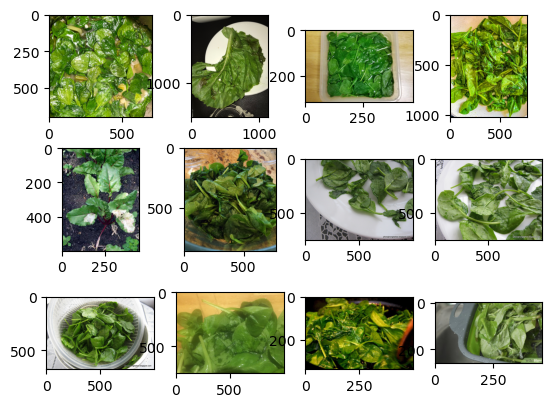

In [26]:
import os
print("Sample Spinach not fresh image:")
train_not_fresh_dir = os.path.join(train_dir, 'Not_fresh')

for n in range(12):
  plt.subplot(int(12/6)+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(load_img(f"{os.path.join(train_not_fresh_dir, os.listdir(train_not_fresh_dir)[n])}"))
  #plt.axis('off')
plt.show()

Sample Spinach not fresh image:


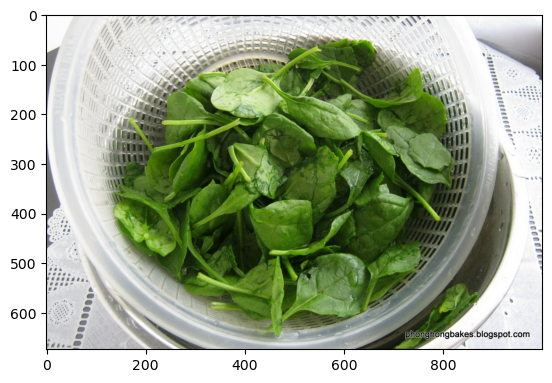

In [27]:
import os
print("Sample Spinach not fresh image:")
train_not_fresh_dir1 = os.path.join(train_dir, 'Not_fresh')
plt.imshow(load_img(f"{os.path.join(train_not_fresh_dir1, os.listdir(train_not_fresh_dir1)[8])}"))
plt.show()

## BUILDING THE MODEL

In [28]:
base_model = InceptionV3(input_shape=(256,256,3), include_top = False)

In [29]:
for layer in base_model.layers:
  layer.trainable = False

In [35]:
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(units=2, activation='sigmoid')(x)

#Final model
model = Model(base_model.input, x)
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate = 0.0001), 
              loss=tensorflow.keras.losses.binary_crossentropy, 
              metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 127, 127, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 127, 127, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

 batch_normalization_99 (BatchN  (None, 29, 29, 64)  192         ['conv2d_99[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_101 (Batch  (None, 29, 29, 64)  192         ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_104 (Batch  (None, 29, 29, 96)  288         ['conv2d_104[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 29, 29, 32)  96          ['conv2d_105[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_116 (Batch  (None, 29, 29, 64)  192         ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 29, 29, 64)   0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_114 (Conv2D)            (None, 29, 29, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_117 (Conv2D)            (None, 29, 29, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 14, 14, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 14, 14, 768)  0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 conv2d_128 (Conv2D)            (None, 14, 14, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 14, 14, 128)  384        ['conv2d_128[0][0]']             
 Normaliza

                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_138 (Conv2D)            (None, 14, 14, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_138 (Batch  (None, 14, 14, 160)  480        ['conv2d_138[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 14, 14, 160)  0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_139 (Conv2D)            (None, 14, 14, 160)  179200      ['activation_138[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 14, 14, 160)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 conv2d_149 (Conv2D)            (None, 14, 14, 160)  179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_149 (Batch  (None, 14, 14, 160)  480        ['conv2d_149[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 14, 14, 160)  0           ['batch_normalization_149[0][0]']
          

                                                                                                  
 batch_normalization_159 (Batch  (None, 14, 14, 192)  576        ['conv2d_159[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_159 (Activation)    (None, 14, 14, 192)  0           ['batch_normalization_159[0][0]']
                                                                                                  
 conv2d_155 (Conv2D)            (None, 14, 14, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_160 (Conv2D)            (None, 14, 14, 192)  258048      ['activation_159[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_164 (Conv2D)            (None, 14, 14, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_168 (Conv2D)            (None, 14, 14, 192)  258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_164 (Batch  (None, 14, 14, 192)  576        ['conv2d_164[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_168 (Batch  (None, 14, 14, 192)  576        ['conv2d_168[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_170 (Batch  (None, 6, 6, 320)   960         ['conv2d_170[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_172[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_173[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_177[0][0]']
          

                                                                                                  
 activation_185 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_185[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 batch_normalization_187 (Batch  (None, 6, 6, 192)   576         ['conv2d_187[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 6, 6, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 

## CALLBACKs AND TRAINING THE MODEL

In [37]:
from tensorflow.keras.callbacks import Callback

#creates a custom callback class
class CustomCallback(Callback):
    """
    This callback will stop the model from training once the model reaches 95% accuracy on the training data
    """
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
            print('Accuracy above 95% -- Stopping Training')
            self.model.stop_training = True #stops model training

callbacks = CustomCallback()

# Train the model with the custom callback
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=50,
    verbose=1,
    callbacks=[callbacks]
)


C:\Users\User\anaconda3\envs\cp\Lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/50
8/8 [==============================] - 29s 3s/step - loss: 3.1436 - accuracy: 0.5958 - val_loss: 0.8550 - val_accuracy: 0.7167
Epoch 2/50
8/8 [==============================] - 18s 2s/step - loss: 1.0973 - accuracy: 0.6792 - val_loss: 0.4330 - val_accuracy: 0.8833
Epoch 3/50
8/8 [==============================] - 17s 2s/step - loss: 0.5024 - accuracy: 0.8333 - val_loss: 0.4346 - val_accuracy: 0.8000
Epoch 4/50
8/8 [==============================] - 19s 2s/step - loss: 0.4744 - accuracy: 0.7958 - val_loss: 0.2739 - val_accuracy: 0.9500
Epoch 5/50
8/8 [==============================] - 19s 2s/step - loss: 0.3322 - accuracy: 0.8625 - val_loss: 0.2552 - val_accuracy: 0.9500
Epoch 6/50
8/8 [==============================] - 19s 2s/step - loss: 0.4005 - accuracy: 0.8625 - val_loss: 0.3620 - val_accuracy: 0.8667
Epoch 7/50
8/8 [==============================] - 19s 2s/step - loss: 0.3686 - accuracy: 0.8167 - val_loss: 1.1658 - val_accuracy: 0.5667
Epoch 8/50
8/8 [==================

In [38]:
h = history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Training and validation loss')

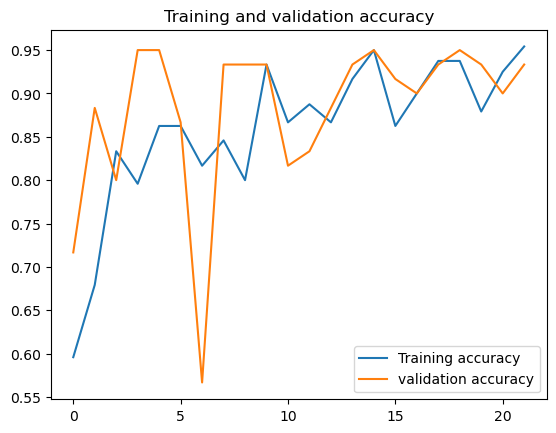

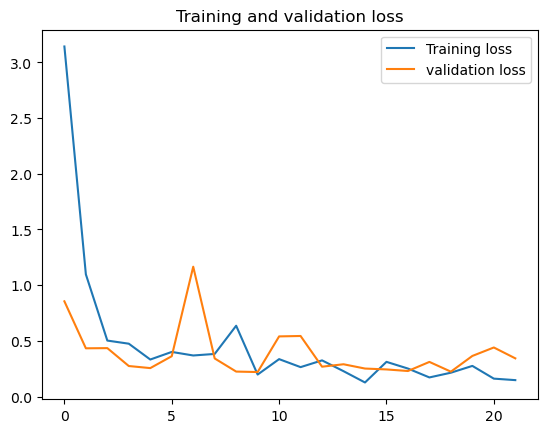

In [39]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc,label="Training accuracy")
plt.plot(epochs, val_acc,label="validation accuracy")
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss,label="Training loss")
plt.plot(epochs, val_loss,label="validation loss")
plt.legend()
plt.title('Training and validation loss')


## EVALUATE MODEL

In [45]:
import matplotlib.pyplot as plt
#import numpy
#from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict labels for test data
y_pred = model.predict(validation_data).argmax(axis=1)  # Predicted labels
y_true = validation_data.classes  # Ground truth labels

cm = confusion_matrix(y_true, y_pred)

cm

4/4 [==============================] - 3s 631ms/step


array([[30,  0],
       [ 4, 26]], dtype=int64)

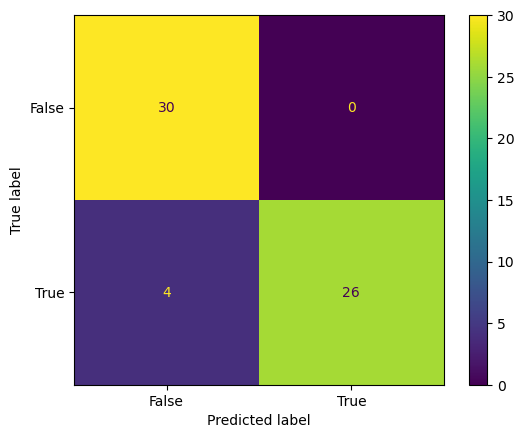

In [46]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

In [43]:
tp = cm[1][1]
fn = cm[1][0]
fp = cm[0][1]
tn = cm[0][0]

accuracy = (tp+tn)/(tp+fn+fp+tn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)
f1_score = (2*precision*sensitivity)/(precision+sensitivity)

def evaluate_model(cm):
  tp = cm[1][1]
  fn = cm[1][0]
  fp = cm[0][1]
  tn = cm[0][0]

  accuracy = (tp+tn)/(tp+fn+fp+tn)
  recall = tp/(tp+fn)
  specificity = tn/(tn+fp)
  precision = tp/(tp+fp)
  f1_score = (2*precision*recall)/(precision+recall)

  return accuracy, recall, specificity,  precision, f1_score

accuracy, recall, specificity,  precision, f1_score = evaluate_model(cm)
print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Specificity: {:.2f}".format(specificity))
print("Precision: {:.2f}".format(precision))
print("F1-Score: {:.2f}".format(f1_score))

Accuracy: 0.92
Recall: 0.83
Specificity: 1.00
Precision: 1.00
F1-Score: 0.91


In [40]:
from sklearn.metrics import f1_score

# Compute F1 score for Validation
f1 = f1_score(y_true, y_pred)

print("F1 Score: {:.2f}".format(f1))
print(y_true)
print(y_pred)

F1 Score: 0.91
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1]


In [42]:
# convert the history.history dict to a pandas DataFrame:  
import pandas as pd   
hist_df = pd.DataFrame(history.history) 

# or save to csv: 
hist_csv_file = 'History/history_model2.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

hist_df

,loss,accuracy,val_loss,val_accuracy
0,3.143647,0.595833,0.855036,0.716667
1,1.097316,0.679167,0.433002,0.883333
2,0.502399,0.833333,0.434611,0.800000
3,0.474424,0.795833,0.273887,0.950000
4,0.332250,0.862500,0.255234,0.950000
5,0.400541,0.862500,0.362030,0.866667
6,0.368582,0.816667,1.165842,0.566667
7,0.382439,0.845833,0.341865,0.933333
8,0.635665,0.800000,0.224051,0.933333
9,0.197143,0.933333,0.219834,0.933333


## SAVE MODEL IN H5 AND CONVERT TO TFLITE

In [69]:
from keras.models import save_model
save_model(model, 'Model/model2.h5')

In [52]:
import tensorflow as tf
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
tflite_model_file = 'converted_model.tflite'

# Save the model.
with open(tflite_model_file, "wb") as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpedvrt5cl\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpedvrt5cl\assets


## TESTING THE MODEL

In [66]:
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

def load_images(directory):
    images = {}
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            path = os.path.join(directory, filename)
            images[filename] = path
    return images

# Specify the directory containing the images
image_directory = "Split_0.2/test_dir"

# Call the function to load images and create a dictionary
image_dict = load_images(image_directory)

#load model
#model = load_model('Model/model2.h5')
for filename, path in image_dict.items():
    # Predicting images
    img = image.load_img(path, target_size=(256, 256))
    x = image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(filename)
    print(classes)
    output_class = np.argmax(classes)
    classname = ['Fresh', 'Not fresh']
    print("The predicted class is", classname[output_class])

1/1 [==============================] - 0s 70ms/step
Fresh_spinach (19).jpeg
[[0.9992601  0.00138307]]
The predicted class is Fresh
1/1 [==============================] - 0s 86ms/step
Fresh_spinach (20).jpeg
[[9.9902123e-01 9.2917465e-04]]
The predicted class is Fresh
1/1 [==============================] - 0s 113ms/step
Fresh_spinach (21).jpeg
[[0.9782454  0.04911293]]
The predicted class is Fresh
1/1 [==============================] - 0s 113ms/step
Fresh_spinach (22).jpeg
[[9.9998027e-01 5.5630444e-05]]
The predicted class is Fresh
1/1 [==============================] - 0s 81ms/step
Spinach_not_fresh (1).jpeg
[[0.01215538 0.995712  ]]
The predicted class is Not fresh
1/1 [==============================] - 0s 87ms/step
Spinach_not_fresh (2).jpg
[[0.01051384 0.9944687 ]]
The predicted class is Not fresh
1/1 [==============================] - 0s 111ms/step
Spinach_not_fresh (3).jpg
[[0.41797423 0.69159615]]
The predicted class is Not fresh
1/1 [==============================] - 0s 88ms/st